# **Objective:**
The aim of this project is to explore and model the **factors influencing student stress levels** through a comprehensive data-driven approach. The project integrates classification models, clustering techniques, and dimensionality reduction to:

1. **Understand key physical, psychological, academic, and social stressors** affecting students.

2. **Predict student stress levels** using a supervised machine learning classifier.

3. **Identify the most influential stress-inducing features.**

4. **Group students into clusters** based on similar stress patterns using unsupervised learning.

5. **Visualize patterns and relationships** in high-dimensional stress-related data using PCA.

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [10, 5]

# **Load Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('/content/StressLevelDataset.csv')
df.head()


Saving StressLevelDataset.csv to StressLevelDataset (1).csv


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# **Explore Dataset**

In [3]:
df.info()
df.describe()
df.columns
print("Shape of dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

# **Visualize Distributions**

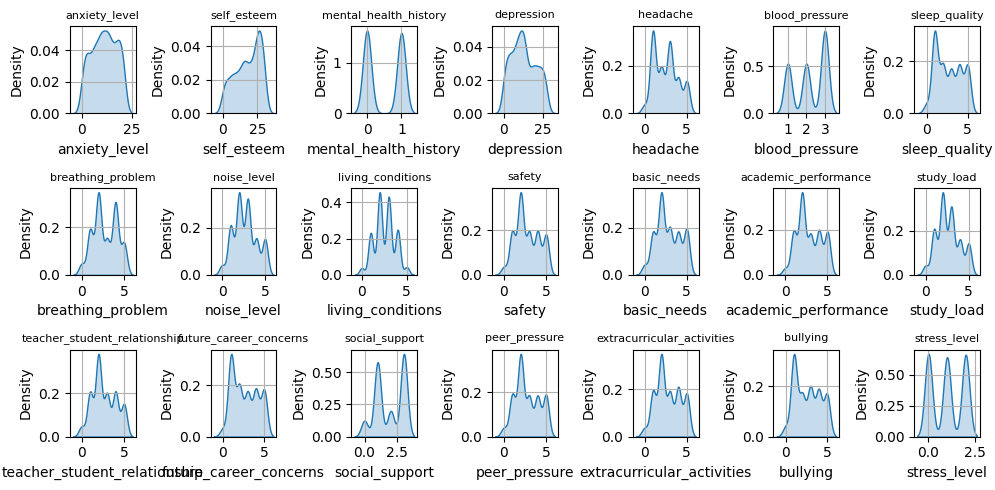

In [4]:
r, c = 3, 7
it = 1
for col in df.columns:
    plt.subplot(r, c, it)
    sns.kdeplot(df[col], fill=True)
    plt.title(col, fontsize=8)
    plt.grid(True)
    it += 1
plt.tight_layout()
plt.show()

# **Correlation Heatmap**

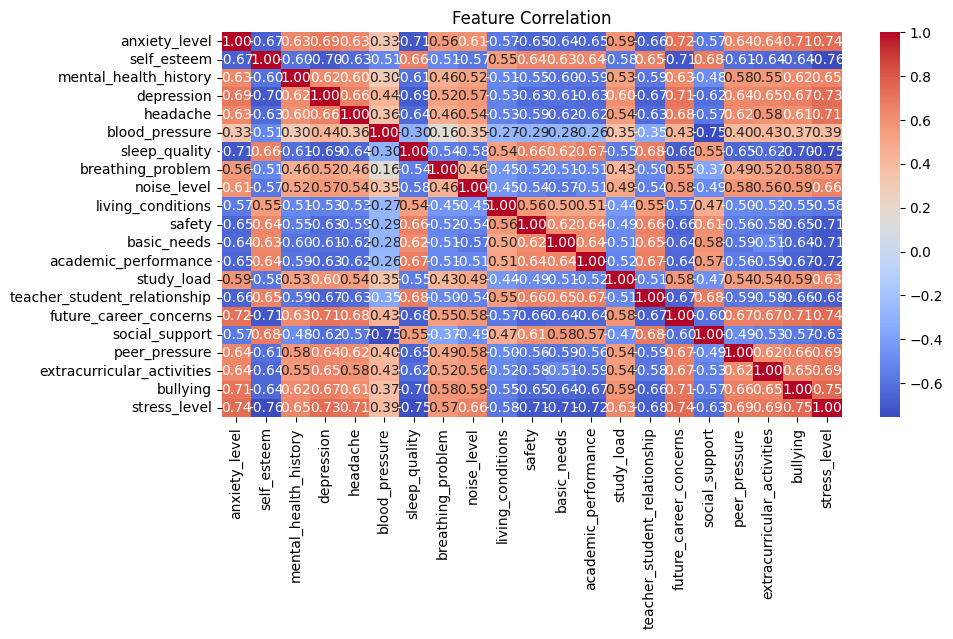

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation")
plt.show()

# **Preprocessing**

In [6]:
from sklearn.preprocessing import MinMaxScaler

x = df.drop('stress_level', axis=1)
y = df['stress_level']

scaler = MinMaxScaler(feature_range=(0, 2))
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
0,1.333333,1.333333,0.0,0.814815,0.8,0.0,0.8,1.6,0.8,1.2,1.2,0.8,1.2,0.8,1.2,1.2,1.333333,1.2,1.2,0.8
1,1.428571,0.533333,2.0,1.111111,2.0,2.0,0.4,1.6,1.2,0.4,0.8,0.8,0.4,1.6,0.4,2.0,0.666667,1.6,2.0,2.0
2,1.142857,1.200000,2.0,1.037037,0.8,0.0,0.8,0.8,0.8,0.8,1.2,0.8,0.8,1.2,1.2,0.8,1.333333,1.2,0.8,0.8
3,1.523810,0.800000,2.0,1.111111,1.6,2.0,0.4,1.2,1.6,0.8,0.8,0.8,0.8,1.6,0.4,1.6,0.666667,1.6,1.6,2.0
4,1.523810,1.866667,0.0,0.518519,0.8,2.0,2.0,0.4,1.2,0.8,1.6,1.2,1.6,1.2,0.4,0.8,0.666667,2.0,0.0,2.0


# **Train-Test Split**

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)


# **Train Random Forest Classifier**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Test Recall:", recall_score(y_test, y_test_pred, average='weighted'))

Train Accuracy: 1.0
Test Accuracy: 0.9
Test Precision: 0.9012142993275069
Test Recall: 0.9


# **Feature Importance**

In [10]:
import plotly.express as px

importances = rf.feature_importances_
px.bar(x=x.columns, y=importances, labels={'x': 'Features', 'y': 'Importance'}, title="Feature Importances")

# **Clustering with KMeans**

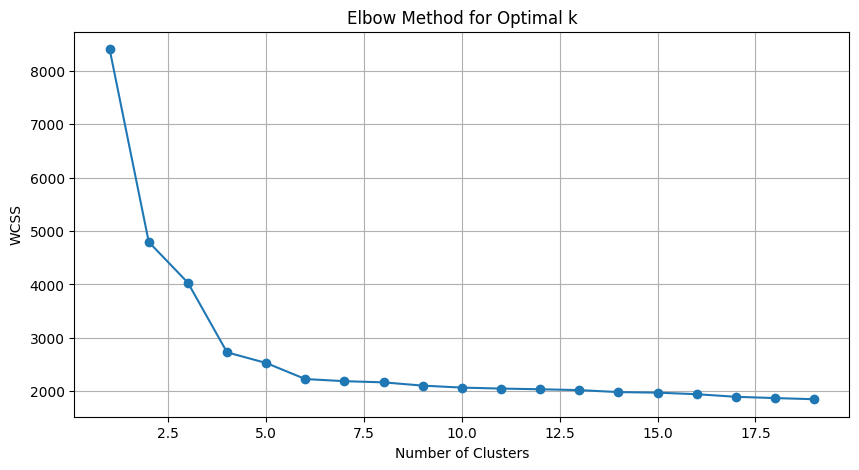

In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# **Apply KMeans Clustering**

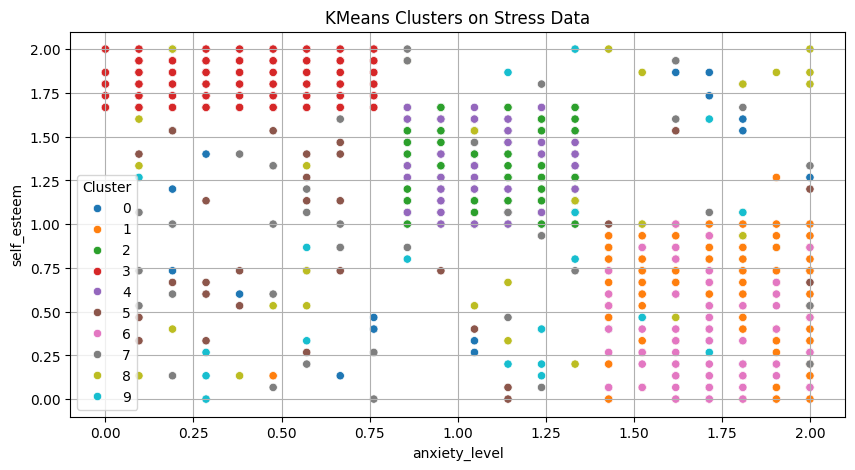

In [12]:
kmeans = KMeans(n_clusters=10, random_state=42)
x_scaled['Cluster'] = kmeans.fit_predict(x_scaled)

sns.scatterplot(data=x_scaled, x='anxiety_level', y='self_esteem', hue='Cluster', palette='tab10')
plt.title("KMeans Clusters on Stress Data")
plt.grid()
plt.show()

# **PCA for Visualization**

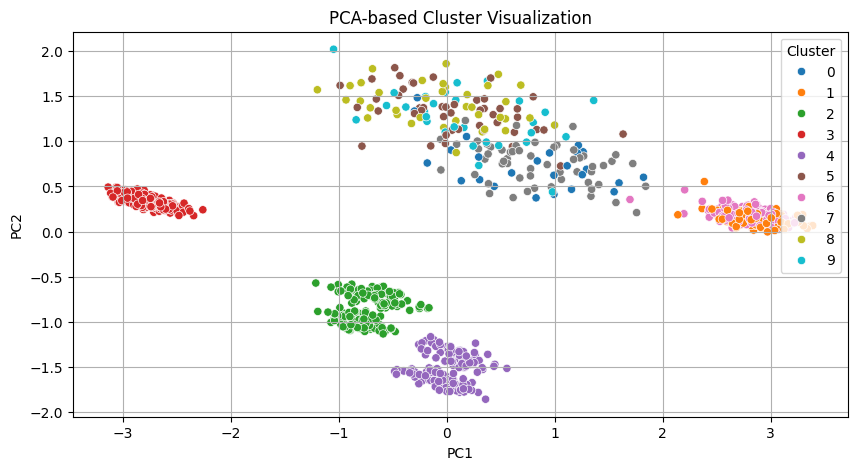

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pd.DataFrame(pca.fit_transform(x_scaled.drop('Cluster', axis=1)), columns=['PC1', 'PC2'])
x_pca['Cluster'] = x_scaled['Cluster']

sns.scatterplot(data=x_pca, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title("PCA-based Cluster Visualization")
plt.grid()
plt.show()
